<a href="https://colab.research.google.com/github/P-eter-shi/dataanalyse/blob/main/datasourcingfakestore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[{'id': 1,
  'title': 'Fjallraven - Foldsack No. 1 Backpack, Fits 15 Laptops',
  'price': 109.95,
  'description': 'Your perfect pack for everyday use and walks in the forest. Stash your laptop (up to 15 inches) in the padded sleeve, your everyday',
  'category': "men's clothing",
  'image': 'https://fakestoreapi.com/img/81fPKd-2AYL._AC_SL1500_t.png',
  'rating': {'rate': 3.9, 'count': 120}},
 {'id': 2,
  'title': 'Mens Casual Premium Slim Fit T-Shirts ',
  'price': 22.3,
  'description': 'Slim-fitting style, contrast raglan long sleeve, three-button henley placket, light weight & soft fabric for breathable and comfortable wearing. And Solid stitched shirts with round neck made for durability and a great fit for casual fashion wear and diehard baseball fans. The Henley style round neckline includes a three-button placket.',
  'category': "men's clothing",
  'image': 'https://fakestoreapi.com/img/71-3HjGNDUL._AC_SY879._SX._UX._SY._UY_t.png',
  'rating': {'rate': 4.1, 'count': 259}},
 {'

Category
electronics         332.498333
jewelery            220.995000
men's clothing       51.057500
women's clothing     26.286667
Name: Price, dtype: float64


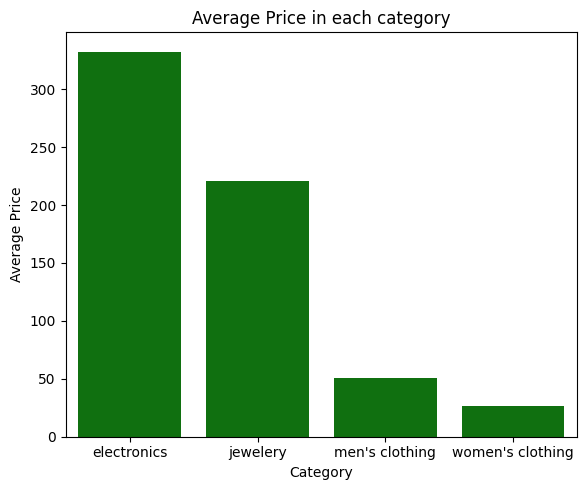

In [ ]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns

# api to fetch data from fakestore
url = 'https://fakestoreapi.com/products'
response = requests.get(url)

if response.status_code == 200:
     data = response.json()
     display(data)
else:
    print(f"Error fetching data from{url}")
df = pd.DataFrame(data)
columns = df.columns.str.title().str.strip() # make column names uniform by uppercasing the first letter
df = df.rename(columns=dict(zip(df.columns, columns)))
df['Ratings'] = df['Rating'].apply(lambda x: x.get('rate') if isinstance(x, dict) else np.nan).astype(float) #extracting values from Ratings to Ratings
df['Count'] = df['Rating'].apply(lambda x: x.get('count') if isinstance(x, dict) else np.na).astype(int) # extracting count values from Ratings to Count
df.drop(columns='Rating', axis = 1, inplace = True) # Drop the Rating column
null_values = df.isna().sum() # check for null values
duplicates = df.duplicated().sum() # check for duplicates
unique_categories = df['Category'].nunique() # number of unique values
cat_group = df.groupby('Category')['Price'].mean()
df['Price'] = df['Price'].abs()
print(cat_group)


#bar graph of category against average price
plt.figure( figsize=(6,5))
sns.barplot(x = cat_group.index, y = cat_group.values, color = 'green')
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.title('Average Price in each category')
plt.tight_layout()
plt.show()

In [ ]:
df.head()
num_products_per_category = df['Category'].value_counts()
print(num_products_per_category)

Category
women's clothing    6
electronics         6
jewelery            4
men's clothing      4
Name: count, dtype: int64


- **It seems like the number of items do not necessarily influence the mean of the price, lets check on the price distributions per category items.**

In [ ]:
df['Price'].describe()

,Price
count,20.000000
mean,162.046000
std,272.220532
min,7.950000
25%,15.240000
50%,56.490000
75%,110.962500
max,999.990000


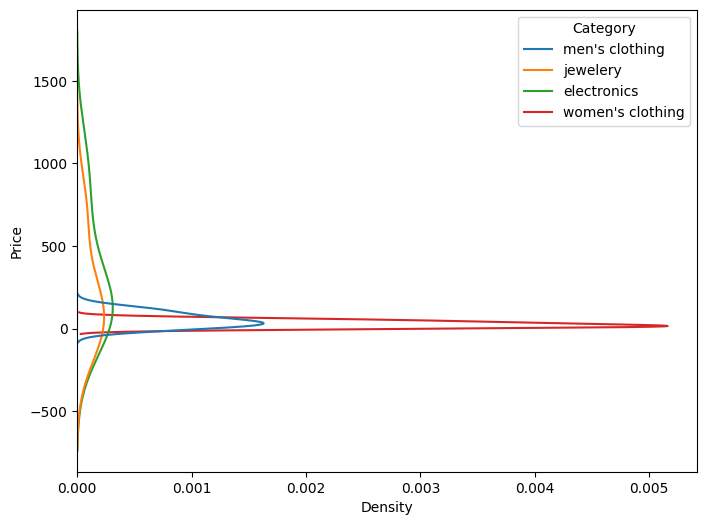

In [ ]:
#plot a kdeplot distribution of each of the categories
plt.figure(figsize=(8,6))
sns.kdeplot(data = df, y = 'Price', hue='Category')
plt.show()

- From the data above, the price of `jewely` and `electronics` are normally distributed.Having price and jewelery prices ranging from low to high prices
- `Womens clothing`, has more data ranging between 0 and 100.The data has a high pick, most of the data ranging between 0 and 20.
- `Mens clothing` has prices ranging between 0 and 200.The distribution is more spread than womens hence, having a high mean compared to `Womens clothing`.

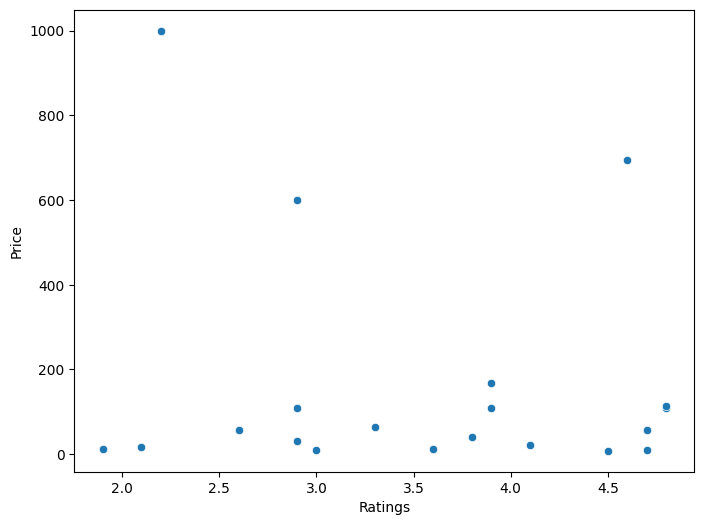

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data = df, y = 'Price', x = 'Ratings')
df.head()
plt.show()

- It seems there is a weak linear relation between `Price` vs `Ratings`, this impleies that the price is independent of the product rating.
- From the correlation table, their is a weak linear relationship between `Price` and `Count`.

In [ ]:
column = df.select_dtypes(include='number').columns
df[column].corr()

,Id,Price,Ratings,Count
Id,1.000000,-0.012433,-0.006476,-0.097408
Price,-0.012433,1.000000,-0.154229,-0.108585
Ratings,-0.006476,-0.154229,1.000000,0.117721
Count,-0.097408,-0.108585,0.117721,1.000000


In [ ]:
df.head()

,Id,Title,Price,Description,Category,Image,Ratings,Count
0,1,"Fjallraven - Foldsack No. 1 Backpack, Fits 15 ...",109.95,Your perfect pack for everyday use and walks i...,men's clothing,https://fakestoreapi.com/img/81fPKd-2AYL._AC_S...,3.9,120
1,2,Mens Casual Premium Slim Fit T-Shirts,22.30,"Slim-fitting style, contrast raglan long sleev...",men's clothing,https://fakestoreapi.com/img/71-3HjGNDUL._AC_S...,4.1,259
2,3,Mens Cotton Jacket,55.99,great outerwear jackets for Spring/Autumn/Wint...,men's clothing,https://fakestoreapi.com/img/71li-ujtlUL._AC_U...,4.7,500
3,4,Mens Casual Slim Fit,15.99,The color could be slightly different between ...,men's clothing,https://fakestoreapi.com/img/71YXzeOuslL._AC_U...,2.1,430
4,5,John Hardy Women's Legends Naga Gold & Silver ...,695.00,"From our Legends Collection, the Naga was insp...",jewelery,https://fakestoreapi.com/img/71pWzhdJNwL._AC_U...,4.6,400
